In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from apyori import apriori

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [45]:
df.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
dtype: object

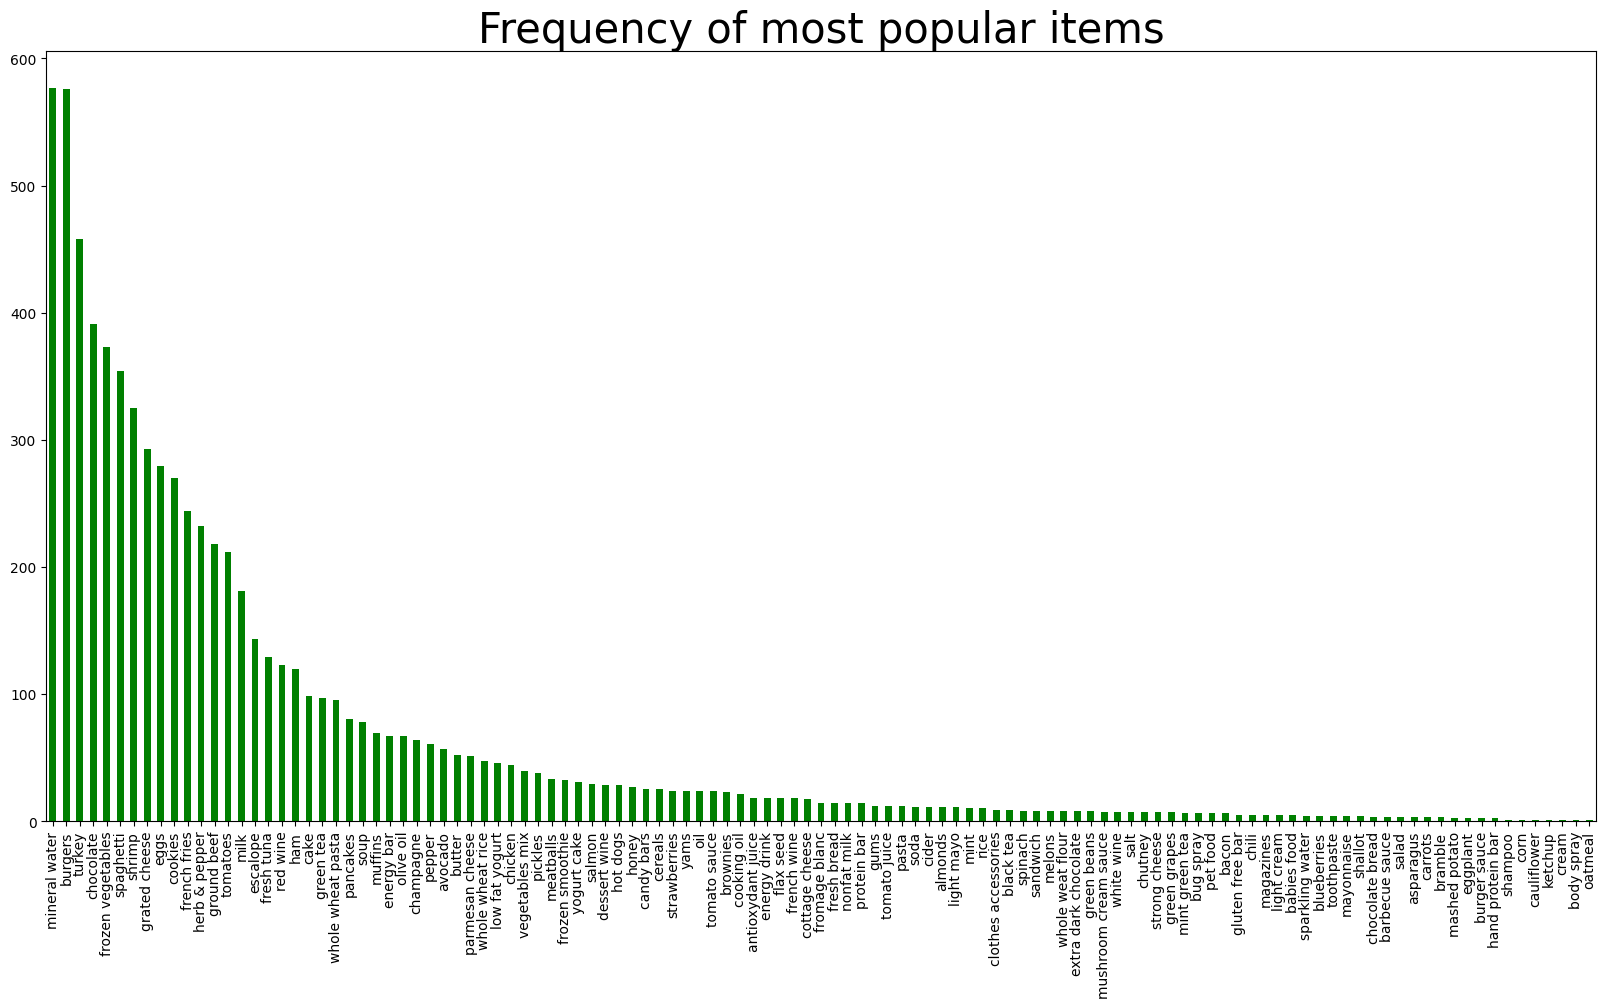

In [46]:
    df[0].value_counts().plot.bar(color='green',figsize=(20,10))
    plt.title('Frequency of most popular items',fontsize=30)
    plt.show()

In [47]:
df.values.tolist()

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['chutney',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['turkey',
  'avocado',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['low fat yogurt',
  nan,
  n

In [48]:
data_list = []
for i in range(len(df)):
    data_list.append([str(df.values[i,j]) for j in range(0, 20) if str(df.values[i,j])!='nan'])

data_list

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [49]:
rules = apriori(data_list,min_support=0.005,min_confidence=0.07,min_lift=3,min_length=2)
values = list(rules)
values

[RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}), items_add=frozenset({'mushroom cream sauce'}), confidence=0.0722689075630252, lift=3.7908326967150496), OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}), items_add=frozenset({'pasta'}), confidence=0.07394957983193277, lift=4.700811850163794), OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), 

In [50]:
i=1
for item in values:
    print("Relation ",i)
    
    temp=item[0]
    items=[it for it in temp]
    print("Rule:  ",items[0],"->",items[1])
    print("Support = ",item[1])
    print("Confidence = ",item[2][0][2])
    print("Lift = ",item[2][0][3])
    print()
    i+=1


Relation  1
Rule:   escalope -> mushroom cream sauce
Support =  0.005732568990801226
Confidence =  0.0722689075630252
Lift =  3.7908326967150496

Relation  2
Rule:   escalope -> pasta
Support =  0.005865884548726837
Confidence =  0.07394957983193277
Lift =  4.700811850163794

Relation  3
Rule:   ground beef -> herb & pepper
Support =  0.015997866951073192
Confidence =  0.1628222523744912
Lift =  3.291993841134928

Relation  4
Rule:   ground beef -> tomato sauce
Support =  0.005332622317024397
Confidence =  0.3773584905660377
Lift =  3.840659481324083

Relation  5
Rule:   whole wheat pasta -> olive oil
Support =  0.007998933475536596
Confidence =  0.12145748987854252
Lift =  4.1224100976422955

Relation  6
Rule:   shrimp -> pasta
Support =  0.005065991201173177
Confidence =  0.3220338983050847
Lift =  4.506672147735896

Relation  7
Rule:   shrimp -> frozen vegetables
Support =  0.005332622317024397
Confidence =  0.07462686567164178
Lift =  3.2545123221103784

Relation  8
Rule:   spaghet

In [51]:
List = []
for item in values:
    temp1=[]
    t=item[0]
    ite=[it for it in t]
    temp1.append(ite[0]+" -> "+ite[1])
    temp1.append(item[1])
    temp1.append(item[2][0][2])
    temp1.append(item[2][0][3])
    List.append(temp1)

In [52]:
List = pd.DataFrame(List)
List.columns = ['Rule','Support','Confidence','Lift']
List.columns

Index(['Rule', 'Support', 'Confidence', 'Lift'], dtype='object')

In [53]:
List.sort_values(by=['Support'])

,Rule,Support,Confidence,Lift
19,spaghetti -> olive oil,0.005066,0.076923,3.052910
5,shrimp -> pasta,0.005066,0.322034,4.506672
18,soup -> olive oil,0.005199,0.078947,3.423030
12,spaghetti -> ground beef,0.005333,0.322581,3.283144
3,ground beef -> tomato sauce,0.005333,0.377358,3.840659
6,shrimp -> frozen vegetables,0.005333,0.074627,3.254512
0,escalope -> mushroom cream sauce,0.005733,0.072269,3.790833
9,spaghetti -> frozen vegetables,0.005733,0.087045,3.124024
1,escalope -> pasta,0.005866,0.073950,4.700812
10,spaghetti -> shrimp,0.005999,0.083955,3.013149


In [54]:
List.sort_values(by=['Confidence'])

,Rule,Support,Confidence,Lift
0,escalope -> mushroom cream sauce,0.005733,0.072269,3.790833
1,escalope -> pasta,0.005866,0.073950,4.700812
6,shrimp -> frozen vegetables,0.005333,0.074627,3.254512
8,shrimp -> frozen vegetables,0.007199,0.075524,3.200616
19,spaghetti -> olive oil,0.005066,0.076923,3.052910
18,soup -> olive oil,0.005199,0.078947,3.423030
10,spaghetti -> shrimp,0.005999,0.083955,3.013149
9,spaghetti -> frozen vegetables,0.005733,0.087045,3.124024
7,spaghetti -> ground beef,0.008666,0.088195,3.165328
11,spaghetti -> tomatoes,0.006666,0.097466,3.498046


In [55]:
List.sort_values(by=['Lift'])

,Rule,Support,Confidence,Lift
15,spaghetti -> ground beef,0.005999,0.523256,3.005315
10,spaghetti -> shrimp,0.005999,0.083955,3.013149
19,spaghetti -> olive oil,0.005066,0.076923,3.052910
17,milk -> olive oil,0.007199,0.109312,3.082509
9,spaghetti -> frozen vegetables,0.005733,0.087045,3.124024
7,spaghetti -> ground beef,0.008666,0.088195,3.165328
8,shrimp -> frozen vegetables,0.007199,0.075524,3.200616
6,shrimp -> frozen vegetables,0.005333,0.074627,3.254512
12,spaghetti -> ground beef,0.005333,0.322581,3.283144
2,ground beef -> herb & pepper,0.015998,0.162822,3.291994
